* This code generates a list of city names for us when provided with a list of coordinates.
* CitiPy is being utilized in the for loop to add cities for every pair of coordinates in our list.
* Students will be responsible for determining precisely how to do this in their homework assignment as well.
* [citipy documentation](https://github.com/wingchen/citipy)

In [1]:
# Dependencies
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from citipy import citipy
import requests
import json
import os
import csv
from config import api_key_weather

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"
cities_df = pd.read_csv('data/worldcities.csv')

In [3]:
positive_df = cities_df.loc[(cities_df.Latitude > 1)&(cities_df.Longitude > 1)]
positive_df.reset_index(drop=True,inplace=True)
few_df = positive_df.loc[positive_df.index < 560]

In [4]:
results = []

# Specify the file to write to
output_path = os.path.join(".", "data", "weatherlog.csv")

# Open the file using "write" mode. Add the header in this block
with open(output_path, 'w', newline='') as csvfile:
    # Initialize csv.writer
    csvwriter = csv.writer(csvfile, delimiter=',')
    csvwriter.writerow(['City', 'Country', 'Lat', 'Long', 'Cloudiness', 'Max Temperature', 'Humidity', 'Windspeed'])

for coord in few_df.itertuples(index=False):    
    
    city = citipy.nearest_city(coord[2], coord[3])
    cityname = city.city_name
    
    countryname = coord[0]
    lat = coord[2]
    long = coord[3]
    
    # Build query URL
    query_url = url + "appid=" + api_key_weather + "&q=" + str(cityname)

    print(f"Processing city name {cityname} in country '{countryname}'.")
    print(query_url)
    
    try:
        # Get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()

        cloudiness = weather_json["clouds"]["all"]
        MaxTemp = weather_json["main"]["temp_max"]
        humidity = weather_json["main"]["humidity"]
        windspeed = weather_json["wind"]["speed"]

        # Open the file using "append" mode. Add the data in this block
        with open(output_path, 'a', newline='') as csvfile:
            # Initialize csv.writer
            csvwriter = csv.writer(csvfile, delimiter=',')

            # Write the data
            csvwriter.writerow([cityname, countryname, lat, long, cloudiness, MaxTemp, humidity, windspeed])

        city_data = {'City': [cityname], 'Lat': [lat], 'Lng': [long], 'Cloudiness': [cloudiness], 'Country': [countryname], 'Humidity': [humidity], 'Max Temperature': [MaxTemp], 'Windspeed': [windspeed]}
        df = pd.DataFrame(data=city_data)
        results.append(df) # append this loop's city data frame to the list of dataframes
    except (KeyError, IndexError):
        print("404 - City not found... skipping.")
        
    print("------------")

Processing city name andorra la vella in country 'ad'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=andorra la vella
------------
Processing city name canillo in country 'ad'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=canillo
------------
Processing city name encamp in country 'ad'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=encamp
------------
Processing city name la massana in country 'ad'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=la massana
------------
Processing city name les escaldes in country 'ad'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=les escaldes
------------
Processing city name ordino in country 'ad'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c3

------------
Processing city name orgun in country 'af'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=orgun
404 - City not found... skipping.
------------
Processing city name pagman in country 'af'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=pagman
404 - City not found... skipping.
------------
Processing city name panjab in country 'af'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=panjab
------------
Processing city name qandahar in country 'af'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=qandahar
404 - City not found... skipping.
------------
Processing city name qarchi gak in country 'af'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=qarchi gak
------------
Processing city name qarqin in coun

------------
Processing city name konispol in country 'al'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=konispol
------------
Processing city name koplik in country 'al'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=koplik
------------
Processing city name korce in country 'al'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=korce
------------
Processing city name kraste in country 'al'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=kraste
404 - City not found... skipping.
------------
Processing city name kruje in country 'al'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=kruje
------------
Processing city name kucove in country 'al'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=

------------
Processing city name aghavnatun in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=aghavnatun
------------
Processing city name akhuryan in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=akhuryan
------------
Processing city name aknalich in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=aknalich
------------
Processing city name aknashen in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=aknashen
------------
Processing city name alaverdi in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=alaverdi
------------
Processing city name amasia in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e

------------
Processing city name aygeshat in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=aygeshat
------------
Processing city name aygeshat in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=aygeshat
------------
Processing city name aygestan in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=aygestan
------------
Processing city name aygezard in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=aygezard
------------
Processing city name aygut in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=aygut
------------
Processing city name ayrum in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c5

------------
Processing city name gay in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=gay
------------
Processing city name geghamasar in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=geghamasar
------------
Processing city name geghamavan in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=geghamavan
------------
Processing city name geghanist in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=geghanist
------------
Processing city name getahovit in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=getahovit
------------
Processing city name getashen in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e

------------
Processing city name lernapat in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=lernapat
------------
Processing city name lernavan in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=lernavan
------------
Processing city name lorut in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=lorut
------------
Processing city name lukashin in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=lukashin
------------
Processing city name madina in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=madina
------------
Processing city name maisyan in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c563

------------
Processing city name paravakar in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=paravakar
404 - City not found... skipping.
------------
Processing city name pemzashen in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=pemzashen
------------
Processing city name pokr mantash in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=pokr mantash
------------
Processing city name proshyan in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=proshyan
------------
Processing city name pshatavan in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=pshatavan
------------
Processing city name ptghni in country 'am'.
http://api.openweathermap.org/data

------------
Processing city name ushi in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=ushi
------------
Processing city name vagharshapat in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=vagharshapat
------------
Processing city name vaghashen in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=vaghashen
------------
Processing city name vahagni in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=vahagni
------------
Processing city name vahan in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=vahan
------------
Processing city name vanadzor in country 'am'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c96

------------
Processing city name baden in country 'at'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=baden
------------
Processing city name bad goisern in country 'at'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=bad goisern
------------
Processing city name bad hall in country 'at'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=bad hall
------------
Processing city name bad hofgastein in country 'at'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=bad hofgastein
------------
Processing city name bad ischl in country 'at'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=bad ischl
------------
Processing city name bad sankt leonhard in country 'at'.
http://api.openweathermap.org/data/2.5/weather?units=Imp

------------
Processing city name gmund in country 'at'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=gmund
------------
Processing city name gotzis in country 'at'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=gotzis
------------
Processing city name gratkorn in country 'at'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=gratkorn
------------
Processing city name graz in country 'at'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=graz
------------
Processing city name grieskirchen in country 'at'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=grieskirchen
------------
Processing city name grodig in country 'at'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c5630

------------
Processing city name lauterach in country 'at'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=lauterach
------------
Processing city name leibnitz in country 'at'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=leibnitz
------------
Processing city name lenzing in country 'at'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=lenzing
------------
Processing city name leoben in country 'at'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=leoben
------------
Processing city name leonding in country 'at'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969c56301f258dde&q=leonding
------------
Processing city name lienz in country 'at'.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=8e5c378a7e1a5d0c969

In [5]:
city_data_pd = pd.concat(results) # Concat list of data frames in results from above to the final data frame
city_data_pd.head()
latdata = city_data_pd["Lat"]
tempdata = city_data_pd["Max Temperature"]
humidity = city_data_pd["Humidity"]
windspeed = city_data_pd["Windspeed"]
cloudiness = city_data_pd["Cloudiness"]

<IPython.core.display.Javascript object>


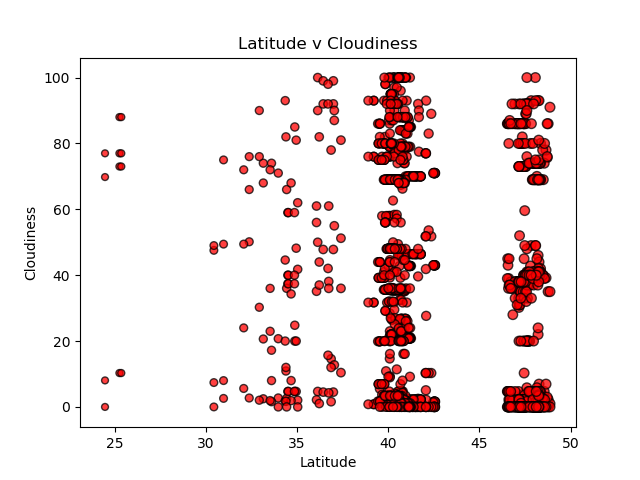

In [39]:
plt.scatter(latdata, tempdata, marker="o", facecolors="red", edgecolors="black",
            s=latdata, alpha=0.75)
# Create a title, x label, and y label for our chart
plt.title("Latitude v Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig("LatTemp.png")
plt.show()

In [40]:
plt.scatter(latdata, humidity, marker="o", facecolors="red", edgecolors="black",
            s=latdata, alpha=0.75)
# Create a title, x label, and y label for our chart
plt.title("Latitude v Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig("LatHumidity.png")
plt.show()

In [41]:
plt.scatter(latdata, windspeed, marker="o", facecolors="red", edgecolors="black",
            s=latdata, alpha=0.75)
# Create a title, x label, and y label for our chart
plt.title("Latitude v Windspeed")
plt.xlabel("Latitude")
plt.ylabel("Windspeed")

plt.savefig("LatWindSpeed.png")
plt.show()

In [42]:
plt.scatter(latdata, cloudiness, marker="o", facecolors="red", edgecolors="black",
            s=latdata, alpha=0.75)
# Create a title, x label, and y label for our chart
plt.title("Latitude v Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig("LatCloudiness.png")
plt.show()